<a href="https://colab.research.google.com/github/majidshahriar35-ops/Big-Data-Analytics/blob/master/Degree_of_centrality(tuple_friend_suggestor_and_more).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
users	=	[
				{	"id":	0,	"name":	"Hero"	},
				{	"id":	1,	"name":	"Dunn"	},
				{	"id":	2,	"name":	"Sue"	},
				{	"id":	3,	"name":	"Chi"	},
				{	"id":	4,	"name":	"Thor"	},
				{	"id":	5,	"name":	"Clive"	},
				{	"id":	6,	"name":	"Hicks"	},
				{	"id":	7,	"name":	"Devin"	},
				{	"id":	8,	"name":	"Kate"	},
				{	"id":	9,	"name":	"Klein"	}
]

friendships	=	[(0,	1),	(0,	2),	(1,	2),	(1,	3),	(2,	3),	(3,	4),
															(4,	5),	(5,	6),	(5,	7),	(6,	8),	(7,	8),	(8,	9)]

In [2]:
for	user	in	users:
				user["friends"]	=	[]
#And	then	we	populate	the	lists	using	the	friendships	data:
for	i,	j	in	friendships:
				#	this	works	because	users[i]	is	the	user	whose	id	is	i
				users[i]["friends"].append(users[j])	#	add	i	as	a	friend	of	j
				users[j]["friends"].append(users[i])	#	add	j	as	a	friend	of	i

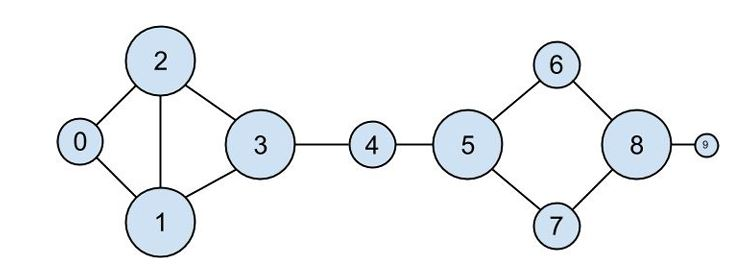

In [3]:
def	number_of_friends(user):
				"""how	many	friends	does	_user_	have?"""
				return	len(user["friends"])												#	length	of	friend_ids	list
total_connections	=	sum(number_of_friends(user)
												for	user	in	users)								#	24

In [4]:
#And	then	we	just	divide	by	the	number	of	users:
from	__future__	import	division																			#	integer	division	is	lame
num_users	=	len(users)																												#	length	of	the	users	list
avg_connections	=	total_connections	/	num_users			#	2.4

In [6]:
#create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                                                  for user in users]
sorted(num_friends_by_id,                                                                   # get it sorted
       key=lambda pair: pair[1],                      # by num_friends
       reverse=True)                                                                                     # largest to smallest
# each pair is (user_id, num_friends)
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
#  (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

#Data	Scientists	You	May	Know

##People you may know suggestor

In [7]:
def	friends_of_friend_ids_bad(user):
				#	"foaf"	is	short	for	"friend	of	a	friend"
		return	[foaf["id"]
						 for	friend	in	user["friends"]					#	for	each	of	user's	friends
						 for	foaf	in	friend["friends"]]				#	get	each	of	_their_	friend

It	includes	user	0	(twice),	since	Hero	is	indeed	friends	with	both	of	his	friends.	It	includes
users	1	and	2,	although	they	are	both	friends	with	Hero	already.	And	it	includes	user	3
twice,	as	Chi	is	reachable	through	two	different	friends:

In [11]:
print(friends_of_friend_ids_bad(users[0]))
print	([friend["id"]	for	friend	in	users[0]["friends"]])		#	[1,	2]
print	([friend["id"]	for	friend	in	users[1]["friends"]])		#	[0,	2,	3]
print	([friend["id"]	for	friend	in	users[2]["friends"]])		#	[0,	1,	3]

[0, 2, 3, 0, 1, 3]
[1, 2]
[0, 2, 3]
[0, 1, 3]


Knowing	that	people	are	friends-of-friends	in	multiple	ways	seems	like	interesting
information,	so	maybe	instead	we	should	produce	a	count	of	mutual	friends.	And	we
definitely	should	use	a	helper	function	to	exclude	people	already	known	to	the	user:

In [15]:
from collections import Counter # not loaded by default

def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]

def not_friends(user, other_user):
    """other_user is not a friend if he's not in user["friends"];
    that is, if he's not_the_same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"] # for each of my friends
                   for foaf in friend["friends"] # count *their* friends
                   if not_the_same(user, foaf)    # who aren't me
                   and not_friends(user, foaf))    # and aren't my friends
print(friends_of_friend_ids(users[4]))

Counter({1: 1, 2: 1, 6: 1, 7: 1})


You	also	might	enjoy	meeting	users	with	similar
interests.	(This	is	a	good	example	of	the	“substantive	expertise”	aspect	of	data	science.)

In [59]:
interests	=	[
				(0,	"Hadoop"),	(0,	"Big Data"),	(0,	"HBase"),	(0,	"Java"),
				(0,	"Spark"),	(0,	"Storm"),	(0,	"Cassandra"),
				(1,	"NoSQL"),	(1,	"MongoDB"),	(1,	"Cassandra"),	(1,	"HBase"),
				(1,	"Postgres"),	(2,	"Python"),	(2,	"scikit-learn"),	(2,	"scipy"),
				(2,	"numpy"),	(2,	"statsmodels"),	(2,	"pandas"),	(3,	"R"),	(3,	"Python"),
				(3,	"statistics"),	(3,	"regression"),	(3,	"probability"),
				(4,	"machine learning"),	(4,	"regression"),	(4,	"decision trees"),
				(4,	"libsvm"),	(5,	"Python"),	(5,	"R"),	(5,	"Java"),	(5,	"C++"),
				(5,	"Haskell"),	(5,	"programming languages"),	(6,	"statistics"),
				(6,	"probability"),	(6,	"mathematics"),	(6,	"theory"),
				(7,	"machine learning"),	(7,	"scikit-learn"),	(7,	"Mahout"),
				(7,	"neural networks"),	(8,	"neural networks"),	(8,	"deep learning"),
				(8,	"Big Data"),	(8,	"artificial intelligence"),	(9,	"Hadoop"),
				(9,	"Java"),	(9,	"MapReduce"),	(9,	"Big	Data")
]

For	example,	Thor	(id	4)	has	no	friends	in	common	with	Devin	(id	7),	but	they	share	an
interest	in	machine	learning.

In [60]:
#It’s	easy	to	build	a	function	that	finds	users	with	a	certain	interest:
def	data_scientists_who_like(target_interest):
		return	[user_id
						 for	user_id,	user_interest	in	interests
						 if	user_interest	==	target_interest]

###This	works,	but	it	has	to	examine	the	whole	list	of	interests	for	every	search.	If	we	have	a lot	of	users	and	interests	(or	if	we	just	want	to	do	a	lot	of	searches),	we’re	probably	better off	building	an	index	from	interests	to	users:

In [61]:
from	collections	import	defaultdict
#	keys	are	interests,	values	are	lists	of	user_ids	with	that	interest
user_ids_by_interest	=	defaultdict(list)
for	user_id,	interest	in	interests:
		user_ids_by_interest[interest].append(user_id)

##And	another	from	users	to	interests:


In [62]:
#	keys	are	user_ids,	values	are	lists	of	interests	for	that	user_id
interests_by_user_id	=	defaultdict(list)
for	user_id,	interest	in	interests:
				interests_by_user_id[user_id].append(interest)

##Now	it’s	easy	to	find	who	has	the	most	interests	in	common	with	a	given	user:
* Iterate	over	the	user’s	interests.
* For	each	interest,	iterate	over	the	other	users	with	that	interest.
* Keep	count	of	how	many	times	we	see	each	other	user

In [63]:
def	most_common_interests_with(user):
    return	Counter(interested_user_id
      for	interest	in	interests_by_user_id[user["id"]]
      for	interested_user_id	in	user_ids_by_interest[interest]
      if	interested_user_id	!=	user["id"])

In [64]:
print(most_common_interests_with(users[0]))
print(most_common_interests_with(users[1]))
print(most_common_interests_with(users[2]))
print(most_common_interests_with(users[3]))

Counter({9: 2, 1: 2, 8: 1, 5: 1})
Counter({0: 2})
Counter({3: 1, 5: 1, 7: 1})
Counter({5: 2, 6: 2, 2: 1, 4: 1})


In [65]:
def most_common_interests_with_name(user):
    shared_interests_by_user = defaultdict(list)
    for interest in interests_by_user_id[user["id"]]:                           # Iterate over the current user's interests
        for interested_user_id in user_ids_by_interest[interest]:               # For each interest, find other users who also have this interest
            if interested_user_id != user["id"]:                                # Ensure the interested user is not the current user
                shared_interests_by_user[interested_user_id].append(interest)   # Add the shared interest to the list for that user
    return shared_interests_by_user

id_to_user = {user["id"]: user for user in users}

In [66]:
def print_shared_interests_with_names(user_id):
    user_name = id_to_user[user_id]["name"]
    print(f"User {user_name} (id:{user_id}) shared interests:")
    shared_interests_data = most_common_interests_with_name(users[user_id])
    for interested_user_id, interests_list in shared_interests_data.items():
        interested_user_name = id_to_user[interested_user_id]["name"]
        print(f"  - With {interested_user_name} (id: {interested_user_id}): {interests_list}")

print_shared_interests_with_names(0)
print_shared_interests_with_names(1)
print_shared_interests_with_names(2)
print_shared_interests_with_names(3)

User Hero (id:0) shared interests:
  - With Klein (id: 9): ['Hadoop', 'Java']
  - With Kate (id: 8): ['Big Data']
  - With Dunn (id: 1): ['HBase', 'Cassandra']
  - With Clive (id: 5): ['Java']
User Dunn (id:1) shared interests:
  - With Hero (id: 0): ['Cassandra', 'HBase']
User Sue (id:2) shared interests:
  - With Chi (id: 3): ['Python']
  - With Clive (id: 5): ['Python']
  - With Devin (id: 7): ['scikit-learn']
User Chi (id:3) shared interests:
  - With Clive (id: 5): ['R', 'Python']
  - With Sue (id: 2): ['Python']
  - With Hicks (id: 6): ['statistics', 'probability']
  - With Thor (id: 4): ['regression']


#Salaries	and	Experience


In [67]:
salaries_and_tenures	=	[(83000,	8.7),	(88000,	8.1),
												 (48000,	0.7),	(76000,	6),
												 (69000,	6.5),	(76000,	7.5),
												 (60000,	2.5),	(83000,	10),
												 (48000,	1.9),	(63000,	4.2)]

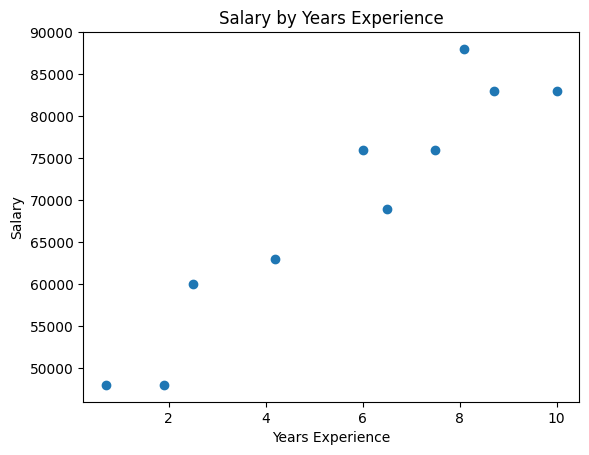

In [68]:
import matplotlib.pyplot as plt

tenures = [tenure for salary, tenure in salaries_and_tenures]
salaries = [salary for salary, tenure in salaries_and_tenures]

plt.scatter(tenures, salaries)
plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Salary by Years Experience")
plt.show()

It	seems	pretty	clear	that	people	with	more	experience	tend	to	earn	more.	How	can	you
turn	this	into	a	fun	fact?

Your	first	idea	is	to	look	at	the	average	salary	for	each	tenure:

In [69]:
#	keys	are	years,	values	are	lists	of	the	salaries	for	each	tenure
salary_by_tenure	=	defaultdict(list)
for	salary,	tenure	in	salaries_and_tenures:
				salary_by_tenure[tenure].append(salary)
#	keys	are	years,	each	value	is	average	salary	for	that	tenure
average_salary_by_tenure	=	{
				tenure	:	sum(salaries)	/	len(salaries)
				for	tenure,	salaries	in	salary_by_tenure.items()
}

This	turns	out	to	be	not	particularly	useful,	as	none	of	the	users	have	the	same	tenure, which	means	we’re	just	reporting	the	individual	users’	salaries:

In [70]:
print(salary_by_tenure)
print(average_salary_by_tenure)

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})
{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


It	might	be	more	helpful	to	bucket	the	tenures:

In [71]:
def tenure_bucket(tenure):
		if tenure < 2:
				return "less than two"
		elif tenure < 5:
				return "between two and five"
		else:
				return "more than five"

Then	group	together	the	salaries	corresponding	to	each	bucket:


In [72]:
# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
		bucket = tenure_bucket(tenure)
		salary_by_tenure_bucket[bucket].append(salary)

And	finally	compute	the	average	salary	for	each	group:

In [73]:
# keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
		tenure_bucket: sum(salaries) / len(salaries)
		for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

print("Average Salary by Tenure Bucket:")
for bucket, avg_salary in average_salary_by_bucket.items():
    print(f"  {bucket}: ${avg_salary:,.2f}")

Average Salary by Tenure Bucket:
  more than five: $79,166.67
  less than two: $48,000.00
  between two and five: $61,500.00


And	you	have	your	soundbite:	“Data	scientists	with	more	than	five	years	experience	earn
65%	more	than	data	scientists	with	little	or	no	experience!”

But	we	chose	the	buckets	in	a	pretty	arbitrary	way.	What	we’d	really	like	is	to	make	some
sort	of	statement	about	the	salary	effect	—	on	average	—	of	having	an	additional	year	of
experience.	In	addition	to	making	for	a	snappier	fun	fact,	this	allows	us	to	make
predictions	about	salaries	that	we	don’t	know.

#Topics	of	Interest

One	simple	(if	not	particularly	exciting)	way	to	find	the	most	popular	interests	is	simply	to
count	the	words:

1.	Lowercase	each	interest	(since	different	users	may	or	may	not	capitalize	their
interests).
2.	Split	it	into	words.
3.	Count	the	results.
In	code:

In [75]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
  if count > 1:
      print (word,count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
